In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
parcels = gpd.read_file("../data/Parcels_1/Parcels_1.shp")
# parcels = gpd.read_file("../data/Durham_Tax_Parcels.gdb")
active_addresses = gpd.read_file("../data/ActiveAdresses.gdb")
landclasses = gpd.read_file("../data/parcels_land_use_main.csv")
parcels.head()

In [11]:
# Compare land classes in parcels data and land class dataset from Vitaly
import pandas as pd

parcels_unique_land_classes = pd.Series(parcels['LAND_CLASS'].unique())
print(parcels_unique_land_classes)


0        CMNTY SVC/ COLLEGE
1             RES/ 2-FAMILY
2             RES/ 1-FAMILY
3           COM/APT-DWG CON
4           COM/ APT-GARDEN
               ...         
223    COM/ DINING ESTABLIS
224    RES/ CONDO-PUD W/ LA
225    VAC COMM SVC/ W/ LSH
226                    None
227               LEASEHOLD
Length: 228, dtype: object


In [10]:
import pandas as pd

vitaly_unique_LC = pd.Series(landclasses['landuse_desc'].unique())
print(vitaly_unique_LC)

0      RES/ RESIDENTIAL (UNDIFF)
1                  RES/ 1-FAMILY
2                  RES/ 2-FAMILY
3                  RES/ 3-FAMILY
4                  RES/ 4-FAMILY
                 ...            
254                             
255     PRESENT-USE/AGRICULTURAL
256         PRESENT-USE/FORESTRY
257    PRESENT-USE/HORTICULTURAL
258      LR CONVEYANCE /REF ONLY
Length: 259, dtype: object


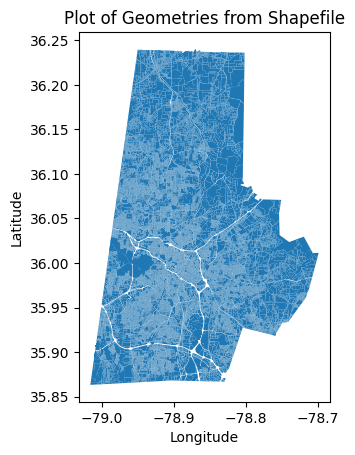

In [62]:
# Plot the GeoDataFrame
parcels.plot()
plt.title("Plot of Geometries from Shapefile")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

/Users/dhavalpotdar/.pyenv/versions/3.10.0/envs/dps/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


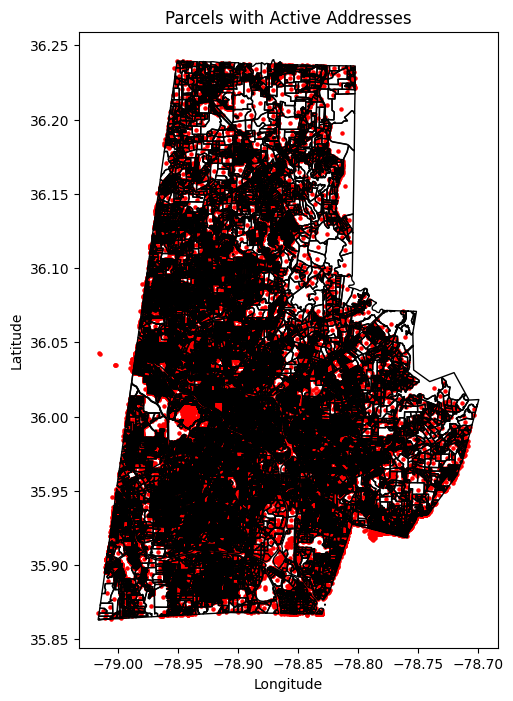

In [63]:
if parcels.crs != active_addresses.crs:
    active_addresses = active_addresses.to_crs(parcels.crs)

# Perform the spatial join
joined_gdf = gpd.sjoin(active_addresses, parcels, how="left", op="within")

# Plot the parcels and addresses
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
parcels.boundary.plot(ax=ax, linewidth=1, color="black")
active_addresses.plot(ax=ax, marker="o", color="red", markersize=5)
plt.title("Parcels with Active Addresses")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Zoom in on a parcel with multiple adresses

In [64]:
# Identify parcels with multiple addresses
parcel_address_counts = joined_gdf.groupby("index_right").size()
parcels_with_multiple_addresses = parcel_address_counts[parcel_address_counts > 1].index

# Select the first parcel with multiple addresses
target_parcel_index = parcels_with_multiple_addresses[0]
print(f"Parcel index with multiple addresses: {target_parcel_index}")

# Filter the GeoDataFrames to include only the target parcel and its addresses
target_parcel = parcels.loc[[target_parcel_index]]
target_addresses = joined_gdf[joined_gdf["index_right"] == target_parcel_index]

Parcel index with multiple addresses: 0.0


In [65]:
target_parcel

,OBJECTID_1,OBJECTID,FEATURE_KE,PARCEL_TYP,REID,PARCEL_PK,AUT_SNAPSH,PIN,PIN_EXT,PIN_MAP,...,MAP_ROD_DO,IS_PENDING,GROSS_LEAS,PLAT_BOOK,PLAT_PAGE,PHOTO_PATH,PHOTO_DATE,Shape__Are,Shape__Len,geometry
0,5293332,78584,78587,0,100000,1,2021-12-20,0822419440,000,0822,...,None,N,0,000000,000000,None,None,4.241395e+06,8814.872258,"MULTIPOLYGON (((-78.91250 36.00508, -78.91253 ..."


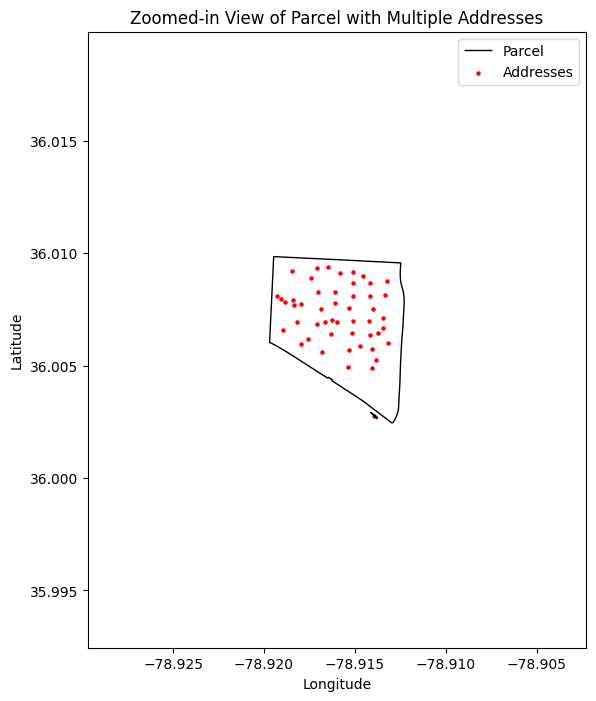

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

target_parcel.boundary.plot(ax=ax, linewidth=1, color="black", label="Parcel")
target_addresses.plot(ax=ax, marker="o", color="red", markersize=5, label="Addresses")

# Set plot title and labels
plt.title("Zoomed-in View of Parcel with Multiple Addresses")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

# Zoom in on the parcel by setting the axis limits to the parcel's bounds
parcel_bounds = target_parcel.total_bounds
ax.set_xlim(parcel_bounds[0] - 0.01, parcel_bounds[2] + 0.01)
ax.set_ylim(parcel_bounds[1] - 0.01, parcel_bounds[3] + 0.01)

plt.show()